## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [2]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [4]:
symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOG']
start_date = datetime(2019,1,1)
end_date = datetime(2019,7,1)
stock_data = web.get_data_yahoo(symbols, start_date, end_date)
stock_data = stock_data.loc[:'2019-07-01']

In [5]:
stock_data

Attributes   Adj Close                                        Close  \
Symbols           MSFT       AMZN       AAPL       GOOG        MSFT   
Date                                                                  
2019-01-02   97.147697  76.956497  38.168343  52.292500  101.120003   
2019-01-03   93.573837  75.014000  34.366501  50.803001   97.400002   
2019-01-04   97.925880  78.769501  35.833584  53.535500  101.930000   
2019-01-07   98.050781  81.475502  35.753826  53.419498  102.059998   
2019-01-08   98.761703  82.829002  36.435398  53.813999  102.800003   
...                ...        ...        ...        ...         ...   
2019-06-25  129.212479  93.913498  47.653671  54.317501  133.429993   
2019-06-26  129.696640  94.891502  48.684372  53.990002  133.929993   
2019-06-27  129.909698  95.213997  48.669758  53.800499  134.149994   
2019-06-28  129.725723  94.681503  48.226288  54.045502  133.960007   
2019-07-01  131.391327  96.109497  49.110790  54.897499  135.679993   

Attributes                                         High             ...  \
Symbols          AMZN       AAPL       GOOG        MSFT       AMZN  ...   
Date                                                                ...   
2019-01-02  76.956497  39.480000  52.292500  101.750000  77.667999  ...   
2019-01-03  75.014000  35.547501  50.803001  100.190002  76.900002  ...   
2019-01-04  78.769501  37.064999  53.535500  102.510002  79.699997  ...   
2019-01-07  81.475502  36.982498  53.419498  103.269997  81.727997  ...   
2019-01-08  82.829002  37.687500  53.813999  103.970001  83.830498  ...   
...               ...        ...        ...         ...        ...  ...   
2019-06-25  93.913498  48.892502  54.317501  137.589996  95.819504  ...   
2019-06-26  94.891502  49.950001  53.990002  135.740005  95.190002  ...   
2019-06-27  95.213997  49.935001  53.800499  134.710007  95.561996  ...   
2019-06-28  94.681503  49.480000  54.045502  134.600006  95.647003  ...   
2019-07-01  96.109497  50.387501  54.897499  136.699997  96.490997  ...   

Attributes        Low                   Open                                   \
Symbols          AAPL       GOOG        MSFT       AMZN       AAPL       GOOG   
Date                                                                            
2019-01-02  38.557499  50.785500   99.550003  73.260002  38.722500  50.828499   
2019-01-03  35.500000  50.703499  100.099998  76.000504  35.994999  52.049999   
2019-01-04  35.950001  51.370899   99.720001  76.500000  36.132500  51.629501   
2019-01-07  36.474998  52.737999  101.639999  80.115501  37.174999  53.575001   
2019-01-08  37.130001  53.026501  103.040001  83.234497  37.389999  53.805500   
...               ...        ...         ...        ...        ...        ...   
2019-06-25  48.822498  54.189999  137.250000  95.592003  49.607498  55.632999   
2019-06-26  49.337502  53.612000  134.350006  94.624001  49.442501  54.325001   
2019-06-27  49.892502  53.764500  134.139999  95.099998  50.072498  54.200001   
2019-06-28  49.262501  53.668499  134.570007  95.455002  49.669998  53.819500   
2019-07-01  50.162498  54.685150  136.630005  96.149002  50.792500  54.900002   

Attributes      Volume                                        
Symbols           MSFT         AMZN         AAPL        GOOG  
Date                                                          
2019-01-02  35329300.0  159662000.0  148158800.0  30652000.0  
2019-01-03  42579100.0  139512000.0  365248800.0  36822000.0  
2019-01-04  44060600.0  183652000.0  234428400.0  41878000.0  
2019-01-07  35656100.0  159864000.0  219111200.0  39638000.0  
2019-01-08  31514400.0  177628000.0  164101200.0  35298000.0  
...                ...          ...          ...         ...  
2019-06-25  33327400.0   60246000.0   84281200.0  30938000.0  
2019-06-26  23657700.0   48838000.0  104270000.0  36218000.0  
2019-06-27  16557500.0   42834000.0   83598800.0  20086000.0  
2019-06-28  30043000.0   60748000.0  124442400.0  33864000.0  


In [6]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,AAPL,GOOG
Date,,,,
2019-01-02,97.147697,76.956497,38.168343,52.292500
2019-01-03,93.573837,75.014000,34.366501,50.803001
2019-01-04,97.925880,78.769501,35.833584,53.535500
2019-01-07,98.050781,81.475502,35.753826,53.419498
2019-01-08,98.761703,82.829002,36.435398,53.813999
...,...,...,...,...
2019-06-25,129.212479,93.913498,47.653671,54.317501
2019-06-26,129.696640,94.891502,48.684372,53.990002
2019-06-27,129.909698,95.213997,48.669758,53.800499


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

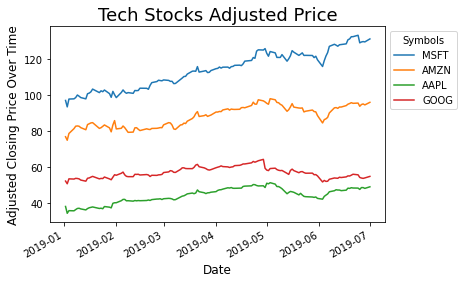

In [7]:
ax = plt.subplot()
stock_data['Adj Close'].plot(ax=ax)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Closing Price Over Time', fontsize=12)
plt.title('Tech Stocks Adjusted Price', fontsize=18)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

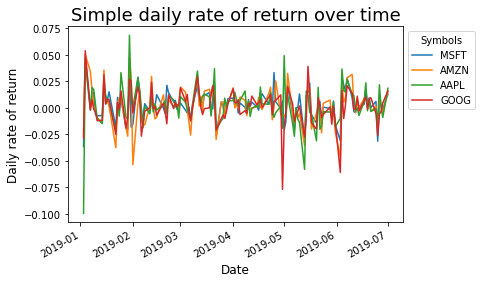

In [8]:
ror = stock_data['Adj Close'].pct_change()
ax = plt.subplot()
ror.plot(ax=ax)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily rate of return', fontsize=12)
plt.title('Simple daily rate of return over time', fontsize=18)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

Creating subplots by setting the subplots parameter equal ton True in the plot method.

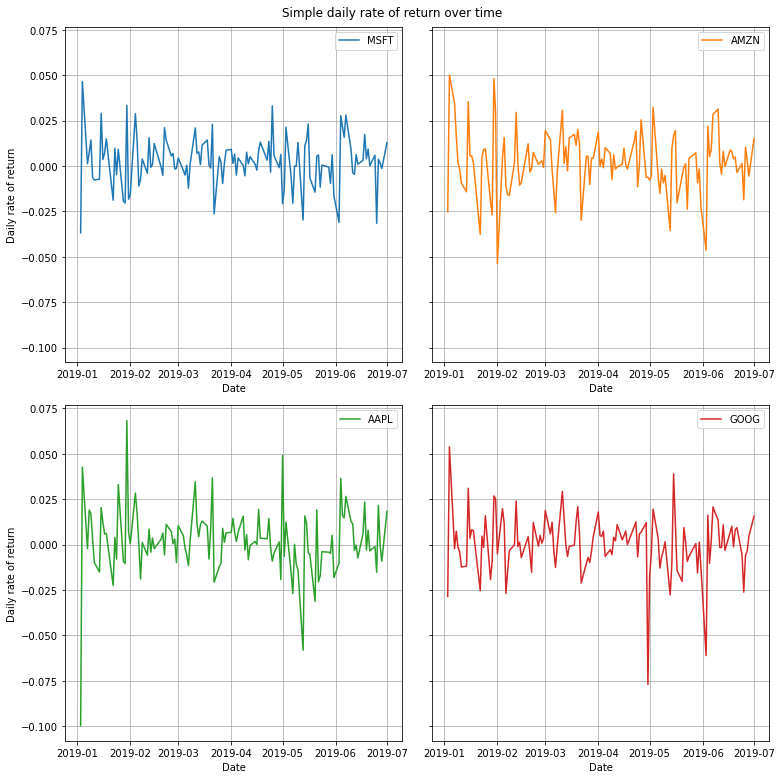

In [47]:
ror.plot(subplots=True,
         layout=(2,2), 
         sharex=False, 
         sharey=True, 
         ylabel = 'Daily rate of return',
         figsize=(11,11),
         grid=True,
         title = 'Simple daily rate of return over time' )
plt.tight_layout()
plt.show()

Creating the subplots by looping through the column names.

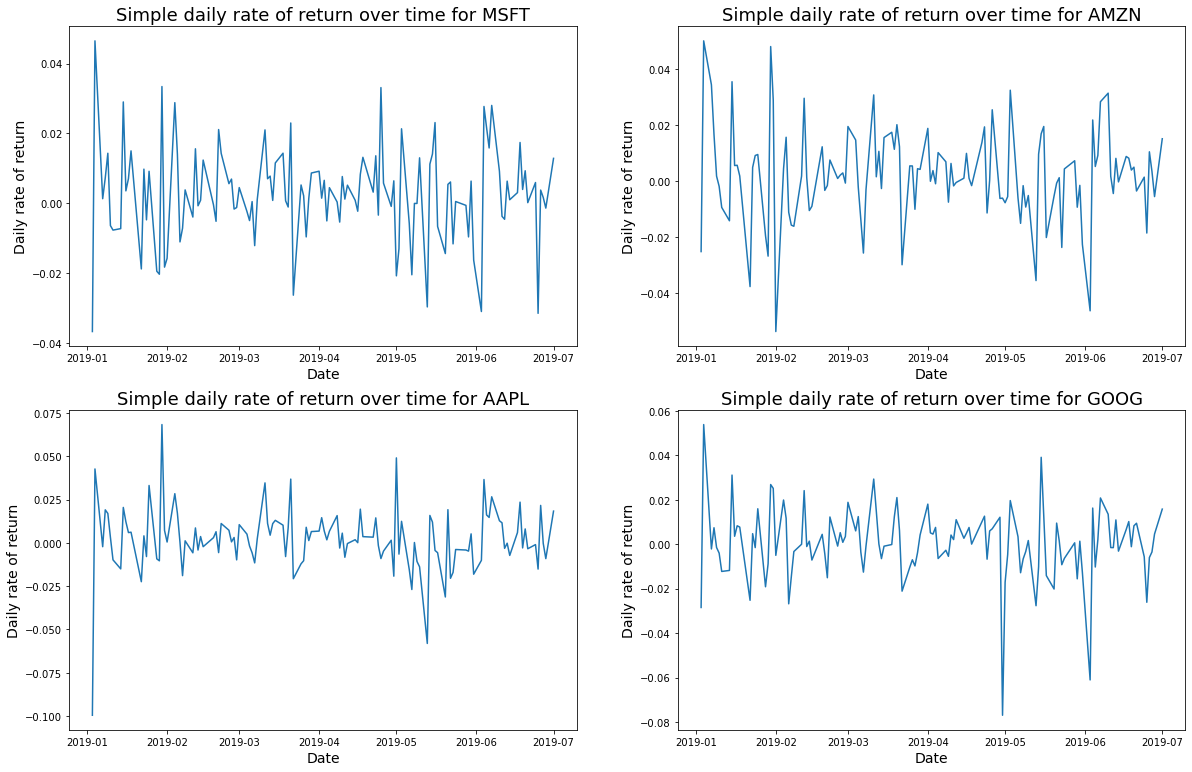

In [19]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(list(ror.columns), 1):
    ax = fig.add_subplot(int(str(32)+str(i)))
    ax.plot(ror[col])
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Daily rate of return", fontsize=14)
    ax.set_title("Simple daily rate of return over time for " + col, fontsize=18)
#plt.tight_layout()
plt.show()
    

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

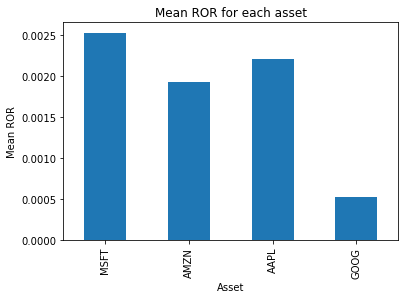

In [57]:
mean_ror = ror.mean()
mean_ror.plot(kind='bar', title = 'Mean ROR for each asset', xlabel = 'Asset', ylabel='Mean ROR')
plt.show()

Based only on the mean ROR during this period, Microsoft would have been the best stock to invest in as it highest mean ROR.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

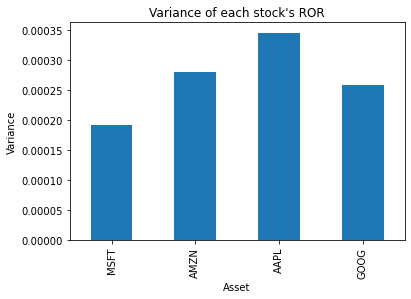

In [62]:
var = ror.var()
var.plot(kind='bar', title = 'Variance of each stock\'s ROR', xlabel = 'Asset', ylabel='Variance')
plt.show()

Apple has the highest variance and so would be the riskiest stock to invest in.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

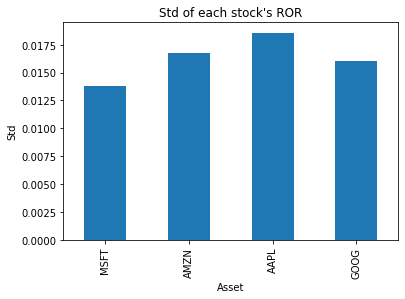

In [64]:
std = ror.std()
std.plot(kind='bar', title = 'Std of each stock\'s ROR', xlabel = 'Asset', ylabel='Std')
plt.show()

Microsoft because it has the highest mean rate of return and lowest standard deviation. 

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

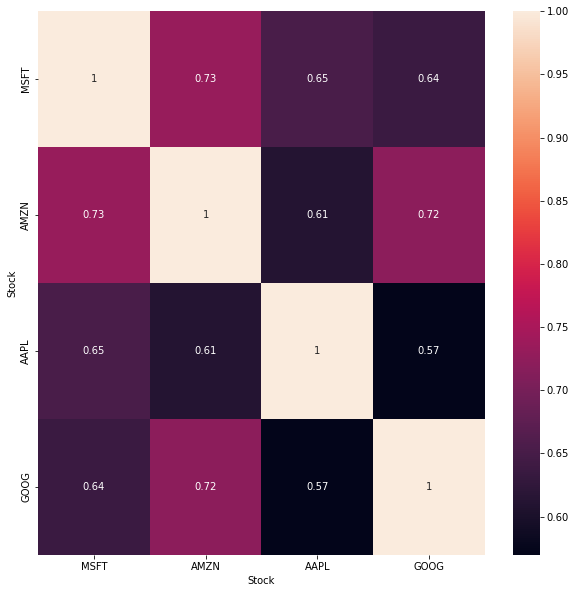

In [75]:
corr_matrix=ror.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=True, ax=ax)
ax.set_xlabel('Stock')
ax.set_ylabel('Stock')
plt.show()

None of the stocks are negatively correlated. Apple and Google have the lowest cor